## Importando as bibliotecas

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

## Análise Exploratória Futebol Internacional

Este dataset consiste no resultado de 43170 partidas internacionais do futebol masculino, desde a primeira partida oficial em 1872 até 2022. As partidas variam desde eventos como a Copa do Mundo FIFA até a Copa do Mundo FIFI e amistosos entre seleções. Além disso a base de dados não inclui partidas dos jogos olímpicos ou partidas onde qualquer uma das seleções jogou com time reserva, ou seleção sub 23 ou contra clube de futebol.

O arquivo results.csv inclui as seguintes colunas:

* date - data da partida
* home_team - nome do time da casa
* away_team - nome do time visitante
* home_score - número de gols marcados pelo time da casa, incluindo acréscimos, sem incluir disputas de pênaltis
* away_score - número de gols marcados pelo time visitante, incluindo acréscimos, sem incluir disputas de pênaltis
* tournament - o nome do torneio
* city - o nome da cidade onde a partida foi disputada
* country -  o nome do país onde a partida foi disputada
* neutral - booleano indicando se a partida foi realizada em campo neutro

O arquivo shootouts.csv inclui as seguintes colunas:

* date - data da partida
* home_team - nome do time da casa
* away_team - nome do time visitante
* winner - o vencedor da disputa de pênaltis

## Carregando os dados

In [149]:
df_resultados = pd.read_csv("datasets/results.csv")
df_resultados_penaltis = pd.read_csv("datasets/shootouts.csv")


In [150]:
df_resultados.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [151]:
df_resultados.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43747,2022-06-14,Moldova,Andorra,2,1,UEFA Nations League,Chișinău,Moldova,False
43748,2022-06-14,Liechtenstein,Latvia,0,2,UEFA Nations League,Vaduz,Liechtenstein,False
43749,2022-06-14,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True
43750,2022-06-14,Japan,Tunisia,0,3,Kirin Cup,Suita,Japan,False
43751,2022-06-14,South Korea,Egypt,4,1,Friendly,Seoul,South Korea,False


In [152]:
df_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43752 entries, 0 to 43751
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43752 non-null  object
 1   home_team   43752 non-null  object
 2   away_team   43752 non-null  object
 3   home_score  43752 non-null  int64 
 4   away_score  43752 non-null  int64 
 5   tournament  43752 non-null  object
 6   city        43752 non-null  object
 7   country     43752 non-null  object
 8   neutral     43752 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [153]:
df_resultados_penaltis.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-17,Thailand,South Korea,South Korea
3,1972-05-19,Thailand,Cambodia,Thailand
4,1973-07-26,Malaysia,Kuwait,Malaysia


In [154]:
df_resultados_penaltis.tail()

,date,home_team,away_team,winner
490,2022-03-25,Tajikistan,Uganda,Uganda
491,2022-03-29,Kazakhstan,Moldova,Kazakhstan
492,2022-03-29,Senegal,Egypt,Senegal
493,2022-06-13,Australia,Peru,Australia
494,2022-06-14,Chile,Ghana,Ghana


In [155]:
df_resultados_penaltis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       495 non-null    object
 1   home_team  495 non-null    object
 2   away_team  495 non-null    object
 3   winner     495 non-null    object
dtypes: object(4)
memory usage: 15.6+ KB


Após a verificação inicial do dataset é possível ver que ambos datasets não possuem valores faltantes, mas ambos possuem a coluna "date" como object, a seguir será convertida para datetime e as colunas serão renomeadas.

In [156]:
df_resultados["date"] = pd.to_datetime(df_resultados["date"])
df_resultados_penaltis["date"] = pd.to_datetime(df_resultados_penaltis["date"])

In [157]:
colunas_df_resultados = [
    "Data da partida",
    "Mandante",
    "Visitante",
    "Gols Mandante",
    "Gols Visitante",
    "Torneio", 
    "Cidade", 
    "País",
    "Neutro"
    ]

colunas_df_resultados_penaltis = [
    "Data",
    "Mandante",
    "Visitante",
    "Vencedor"
]

In [158]:
dict1 = {col:nova_col for col,nova_col in zip(df_resultados.columns,colunas_df_resultados)}
dict2 = {col:nova_col for col,nova_col in zip(df_resultados_penaltis.columns,colunas_df_resultados_penaltis)}

In [159]:
df_resultados = df_resultados.rename(columns= dict1)
df_resultados_penaltis = df_resultados_penaltis.rename(columns= dict2)

In [160]:
df_resultados.head()

,Data da partida,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [161]:
df_resultados["Torneio"].unique()

array(['Friendly', 'British Championship', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Copa Roca', 'Copa América', 'Copa Chevallier Boutell',
       'Nordic Championship', 'International Cup', 'Baltic Cup',
       'Balkan Cup', 'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFU Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Juan Pinto Durán', 'Arab Cup',
       'South Pacific Ga

Criando uma coluna para indicar o resultado da partida indicando o nome do vencedor ou se foi empate

In [162]:
df_resultados["Resultado"] = [mandante if placar_m > placar_v else visitante if placar_m < placar_v else 'Empate'for placar_m, placar_v, mandante, visitante in zip(df_resultados["Gols Mandante"],df_resultados["Gols Visitante"],df_resultados["Mandante"],df_resultados["Visitante"])]

In [163]:
df_resultados["Ano"] = df_resultados["Data da partida"].dt.year
df_resultados["Mês"] = df_resultados["Data da partida"].dt.month
df_resultados["Dia"] = df_resultados["Data da partida"].dt.day

In [164]:
df_resultados.groupby(["Resultado","Ano"])

In [165]:
df_resultados.loc[(df_resultados["Mandante"] == "England")|(df_resultados["Visitante"] == "England")]

,Data da partida,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro,Resultado,Ano,Mês,Dia
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Empate,1872,11,30
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,1873,3,8
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1874,3,7
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Empate,1875,3,6
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,1876,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43414,2022-03-29,England,Ivory Coast,3,0,Friendly,London,England,False,England,2022,3,29
43531,2022-06-04,Hungary,England,1,0,UEFA Nations League,Budapest,Hungary,False,Hungary,2022,6,4
43589,2022-06-07,Germany,England,1,1,UEFA Nations League,Munich,Germany,False,Empate,2022,6,7
43676,2022-06-11,England,Italy,0,0,UEFA Nations League,Wolverhampton,England,False,Empate,2022,6,11


## Análise Exploratória

Para a execução das análises, se vê a necessidade de uma função para selecionar as partidas que contenham 

In [166]:
def df_resultados_pais(pais : str) -> pd.DataFrame:
    df_pais =  df_resultados.loc[(df_resultados["Mandante"] == pais)|(df_resultados["Visitante"] == pais)]
    df_pais_penaltis = df_resultados_penaltis.loc[(df_resultados_penaltis["Mandante"] == pais)|(df_resultados_penaltis["Visitante"] == pais)]
    return df_pais, df_pais_penaltis

### Utilizando a função para observar os jogos do Brasil:

In [167]:
df_brasil, df_brasil_penaltis = df_resultados_pais("Brazil")

In [168]:
df_brasil.head()

,Data da partida,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro,Resultado,Ano,Mês,Dia
410,1914-09-20,Argentina,Brazil,3,0,Friendly,Buenos Aires,Argentina,False,Argentina,1914,9,20
411,1914-09-27,Argentina,Brazil,0,1,Copa Roca,Buenos Aires,Argentina,False,Brazil,1914,9,27
441,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,Empate,1916,7,8
442,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,Empate,1916,7,10
444,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,Uruguay,1916,7,12


Analisando com ajuda de um gráfico o desempenho da seleção brasileira em partidas regulares:

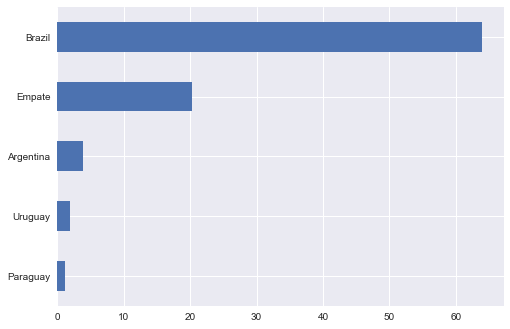

In [169]:
df_brasil["Resultado"].value_counts(normalize=True, ascending = True).mul(100).tail().plot.barh();

In [170]:
df_brasil["Resultado"].value_counts(normalize=True).mul(100).round(3).astype(str).head() + '%'

Brazil       64.004%
Empate       20.217%
Argentina     3.846%
Uruguay       1.972%
Paraguay      1.085%
Name: Resultado, dtype: object

In [171]:
df_brasil.shape

(1014, 13)

Observando o dataset

In [172]:
df_brasil_penaltis.head()

,Data,Mandante,Visitante,Vencedor
51,1983-10-20,Brazil,Paraguay,Brazil
78,1986-06-21,Brazil,France,France
147,1993-06-27,Brazil,Argentina,Argentina
155,1994-07-17,Brazil,Italy,Brazil
165,1995-07-17,Brazil,Argentina,Brazil


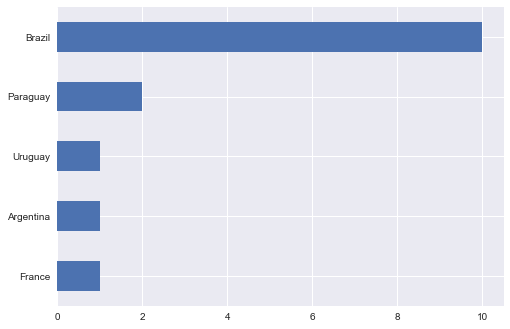

In [173]:
df_brasil_penaltis["Vencedor"].value_counts(ascending = True).tail().plot.barh();

In [174]:
df_brasil_penaltis.shape

(15, 4)

In [175]:
df_brasil_penaltis["Vencedor"].value_counts()

Brazil       10
Paraguay      2
France        1
Argentina     1
Uruguay       1
Name: Vencedor, dtype: int64

In [176]:
df_brasil_penaltis["Vencedor"].value_counts(normalize=True).mul(100).round(2).astype(str).head() + '%'

Brazil       66.67%
Paraguay     13.33%
France        6.67%
Argentina     6.67%
Uruguay       6.67%
Name: Vencedor, dtype: object

Observando os 5 principais df_resultados vemos que no total, a seleção venceu 64% das partidas regulares, empatando 20.2% e nas disputas de pênaltis saiu vitoriosa em 2/3 das 15 que participou. As informações são interessantes, mas esses números não consideram a dimensão de tempo, logo é necessário analisar os df_resultados ao longo dos anos.

### Realizando filtragem e verificando a performance entre o tetra e o pentacampeonato do Brasil.

In [177]:
df_tetra_penta = df_brasil.loc[(df_brasil["Ano"] < 2003)&(df_brasil["Ano"] > 1994)]
df_tetra_penta["Resultado"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Brazil           69.5%
Empate           16.3%
Mexico            2.1%
Argentina         2.1%
Norway            1.4%
France            1.4%
Paraguay          1.4%
United States     0.7%
South Korea       0.7%
Chile             0.7%
Ecuador           0.7%
Australia         0.7%
Uruguay           0.7%
Honduras          0.7%
Bolivia           0.7%
Name: Resultado, dtype: object

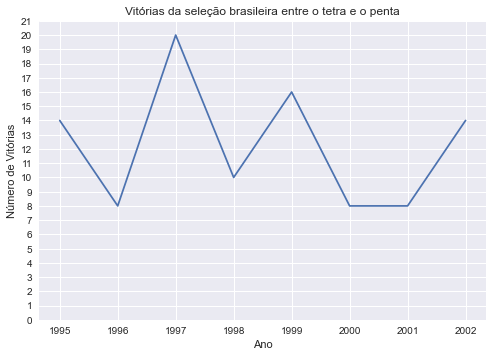

In [178]:
df_tetra_penta[["Ano","Resultado"]].groupby(["Ano","Resultado"]).size().unstack(fill_value = 0)['Brazil'].plot()
plt.ylabel("Número de Vitórias")
plt.yticks(np.arange(0, 22, 1))
plt.title("Vitórias da seleção brasileira entre o tetra e o penta");

### Verificando como a seleção se saiu ao longo dos anos.

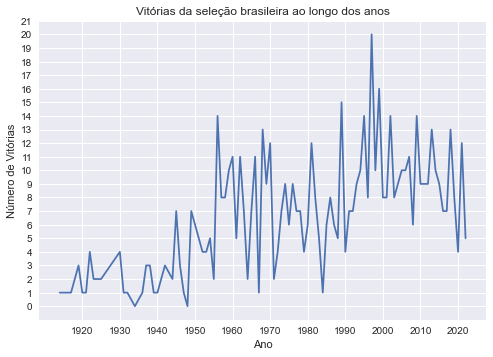

In [179]:
df_brasil[["Ano","Resultado"]].groupby(["Ano","Resultado"]).size().unstack(fill_value = 0)['Brazil'].plot()
plt.ylabel("Número de Vitórias")
plt.yticks(np.arange(0, 22, 1))
plt.xticks(np.arange(df_brasil["Ano"].min() + 6, df_brasil["Ano"].max() + 6, 10)) 
plt.title("Vitórias da seleção brasileira ao longo dos anos");

Observando a linhas, vemos que o pico de vitórias da Seleção aconteceu no final da década de 90, que quando comparado com as últimas duas décadas, parece indicar um declínio da seleção no cenário internacional. 

Contudo, existem outras explicações possíveis, por exemplo a diminuição do número total de jogos ou a realização de mais amistosos na década de 90, que poderiam explicar esse valor, logo seria mais útil verificar o desempenho percentual ao longo dos anos.

In [180]:

df_percetual = df_brasil[["Resultado","Ano"]].groupby("Ano", as_index=False).value_counts(normalize=True)
df_percetual

,Ano,Resultado,proportion
0,1914,Brazil,0.500000
1,1914,Argentina,0.500000
2,1916,Empate,0.500000
3,1916,Uruguay,0.250000
4,1916,Brazil,0.250000
...,...,...,...
312,2021,Brazil,0.750000
313,2021,Empate,0.187500
314,2021,Argentina,0.062500
315,2022,Brazil,0.833333


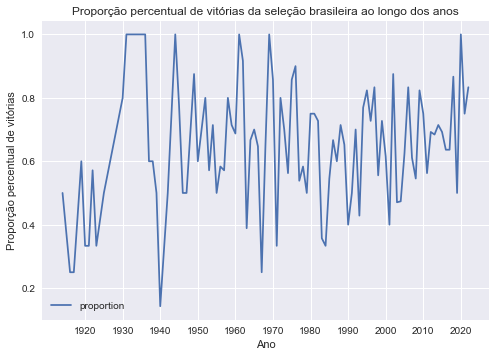

In [181]:
df_percetual[["Ano","proportion"]].loc[df_percetual["Resultado"] == "Brazil"].plot(x = "Ano", y = "proportion")
plt.ylabel("Proporção percentual de vitórias")
plt.xticks(np.arange(df_percetual["Ano"].min() + 6, df_percetual["Ano"].max() + 6, 10)) 
plt.title("Proporção percentual de vitórias da seleção brasileira ao longo dos anos");

Agora analisando o desempenho percertual vemos que o desempenho não era tão dominante no cenário durante as década de 90 e 2000, e constata-se que o desempenho da seleção vem aumentando desde então. Mas ainda há a faceta de quanto e quais campeonatos foram disputados para resultar nessa melhora. O que será explorado de forma mais  na próxima seção.

## df_resultados por competição

In [182]:
df_resultados["Torneio"].value_counts().head(10)

Friendly                                17362
FIFA World Cup qualification             7775
UEFA Euro qualification                  2593
African Cup of Nations qualification     1773
FIFA World Cup                            900
Copa América                              841
AFC Asian Cup qualification               764
African Cup of Nations                    742
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Name: Torneio, dtype: int64

In [183]:
df_brasil["Torneio"].value_counts().head(10)

Friendly                        427
Copa América                    191
FIFA World Cup qualification    127
FIFA World Cup                  109
Confederations Cup               33
Copa Roca                        23
Copa Rio Branco                  18
Copa Oswaldo Cruz                16
Pan American Championship        16
Gold Cup                         14
Name: Torneio, dtype: int64

In [184]:
def gera_df_competicao(competicao : str, df_filtrar : pd.DataFrame) -> pd.DataFrame:
    df_competicao =  df_filtrar.loc[(df_filtrar["Torneio"] == competicao)]
    return df_competicao

In [185]:
gera_df_competicao("Copa América",df_brasil).head(10)

,Data da partida,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro,Resultado,Ano,Mês,Dia
441,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,Empate,1916,7,8
442,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,Empate,1916,7,10
444,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,Uruguay,1916,7,12
472,1917-10-03,Argentina,Brazil,4,2,Copa América,Montevideo,Uruguay,True,Argentina,1917,10,3
476,1917-10-07,Uruguay,Brazil,4,0,Copa América,Montevideo,Uruguay,False,Uruguay,1917,10,7
477,1917-10-12,Brazil,Chile,5,0,Copa América,Montevideo,Uruguay,True,Brazil,1917,10,12
503,1919-05-11,Brazil,Chile,6,0,Copa América,Rio de Janeiro,Brazil,False,Brazil,1919,5,11
508,1919-05-18,Brazil,Argentina,3,1,Copa América,Rio de Janeiro,Brazil,False,Brazil,1919,5,18
512,1919-05-26,Brazil,Uruguay,2,2,Copa América,Rio de Janeiro,Brazil,False,Empate,1919,5,26
513,1919-05-29,Brazil,Uruguay,1,0,Copa América,Rio de Janeiro,Brazil,False,Brazil,1919,5,29


In [186]:
gera_df_competicao("Brazil Independence Cup",df_brasil).head(10)

,Data da partida,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro,Resultado,Ano,Mês,Dia
8349,1972-06-28,Brazil,Czechoslovakia,0,0,Brazil Independence Cup,Rio de Janeiro,Brazil,False,Empate,1972,6,28
8355,1972-07-02,Brazil,Yugoslavia,3,0,Brazil Independence Cup,São Paulo,Brazil,False,Brazil,1972,7,2
8362,1972-07-05,Brazil,Scotland,1,0,Brazil Independence Cup,Rio de Janeiro,Brazil,False,Brazil,1972,7,5
8370,1972-07-09,Brazil,Portugal,1,0,Brazil Independence Cup,Rio de Janeiro,Brazil,False,Brazil,1972,7,9


In [187]:
gera_df_competicao("Copa América",df_resultados).head(10)

,Data da partida,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro,Resultado,Ano,Mês,Dia
438,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,1916,7,2
440,1916-07-06,Argentina,Chile,6,1,Copa América,Buenos Aires,Argentina,False,Argentina,1916,7,6
441,1916-07-08,Brazil,Chile,1,1,Copa América,Buenos Aires,Argentina,True,Empate,1916,7,8
442,1916-07-10,Argentina,Brazil,1,1,Copa América,Buenos Aires,Argentina,False,Empate,1916,7,10
444,1916-07-12,Brazil,Uruguay,1,2,Copa América,Buenos Aires,Argentina,True,Uruguay,1916,7,12
446,1916-07-17,Argentina,Uruguay,0,0,Copa América,Avellaneda,Argentina,False,Empate,1916,7,17
471,1917-09-30,Uruguay,Chile,4,0,Copa América,Montevideo,Uruguay,False,Uruguay,1917,9,30
472,1917-10-03,Argentina,Brazil,4,2,Copa América,Montevideo,Uruguay,True,Argentina,1917,10,3
473,1917-10-06,Argentina,Chile,1,0,Copa América,Montevideo,Uruguay,True,Argentina,1917,10,6
476,1917-10-07,Uruguay,Brazil,4,0,Copa América,Montevideo,Uruguay,False,Uruguay,1917,10,7


In [188]:
gera_df_competicao("King's Cup",df_resultados).head(10)

,Data da partida,Mandante,Visitante,Gols Mandante,Gols Visitante,Torneio,Cidade,País,Neutro,Resultado,Ano,Mês,Dia
7025,1968-11-20,Myanmar,Laos,3,0,King's Cup,Bangkok,Thailand,True,Myanmar,1968,11,20
7029,1968-11-20,Thailand,Singapore,3,0,King's Cup,Bangkok,Thailand,False,Thailand,1968,11,20
7030,1968-11-21,Indonesia,Malaysia,1,0,King's Cup,Bangkok,Thailand,True,Indonesia,1968,11,21
7031,1968-11-22,Myanmar,Singapore,2,0,King's Cup,Bangkok,Thailand,True,Myanmar,1968,11,22
7032,1968-11-22,Thailand,Laos,1,0,King's Cup,Bangkok,Thailand,False,Thailand,1968,11,22
7037,1968-11-24,Myanmar,Indonesia,1,3,King's Cup,Bangkok,Thailand,True,Indonesia,1968,11,24
7039,1968-11-24,Laos,Malaysia,0,5,King's Cup,Bangkok,Thailand,True,Malaysia,1968,11,24
7042,1968-11-26,Indonesia,Singapore,7,0,King's Cup,Bangkok,Thailand,True,Indonesia,1968,11,26
7045,1968-11-28,Indonesia,Malaysia,6,1,King's Cup,Bangkok,Thailand,True,Indonesia,1968,11,28
7046,1968-11-29,Thailand,Myanmar,1,2,King's Cup,Bangkok,Thailand,False,Myanmar,1968,11,29
